## Create an account
#### 03.1 Winter School on Smart Contracts
##### Peter Gruber (peter.gruber@usi.ch)
2023-02-06 (started 2021-11-28)

* Install Algorand Python SDK
* Create accounts
    * Mnemonic $\leftrightarrow$ private key
    * Private key $\rightarrow$ public key
* QR codes

## ❗️Install Algorand SDK
* Use menu **Kernel/Restart Kernel** afterwards.
* To verify that you installed the latest version, go here: https://py-algorand-sdk.readthedocs.io/en/latest/

In [1]:
# Run this only once, then comment out
!pip install py-algorand-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.9/349.9 kB 35.4 MB/s eta 0:00:00


In [ ]:
# What to do if this does not work
#!pip install --upgrade pip
#!pip install --upgrade pip setuptools wheel

In [24]:
from algosdk import account, mnemonic

### Create a key pair and menemonic locally

`account.generate_account()` produces a pair of public and private keys

* Create a random private key
* Provide according mnemonic
* Calcualte public address from private key

**Note:** The keys only exist on your computer. We did not (yet) interact with the blockchain.

In [9]:
account.generate_account()

('b82l0I2qGkq0TjjP+Nms/WOpiyXKGSjou9M+iT6HKjBuu6Q0jfA1o1lXqy5ubxJgq0obipAy7ztzCxwKo65RYg==',
 'N252INEN6A22GWKXVMXG43YSMCVUUG4KSAZO6O3TBMOAVI5OKFRH3NENSA')

**EXERCISE:** Run the above cell several times

#### Step 1: Obtain new private key
Add index `[0]` to obtain only the private key

In [10]:
private_key=account.generate_account()[0]                 # Why the [0]? Because generate_account() returns a list!
print(private_key)

u3qiKewdQBDC16h/0e2Sbnw71cjFTxZpHt6BUENEgPpH0wvGUKbfv3ebKuR/Z6zfjJubNMrsweu+/UzkXtbwMQ==


#### Step 2: Private key $\leftrightarrow$ mnemonic

In [11]:
passphrase = mnemonic.from_private_key(private_key)
print(passphrase)

first measure below tell lens lottery safe potato copper resemble enact shoulder ivory crystal comic exist carpet keen upper amount mammal baby staff abstract robust


In [6]:
# Quick check: do we get back from the menmonic to the private key?
private_key = mnemonic.to_private_key(passphrase)               
print(private_key)                                         # Yes!! Same as above!

GP2PSay2K7vKc1Src2KVBbgdvEaCMmwaiNMymRu5eMA+OgqIWojYvXXfmAKOLXpvBzqQOrtZeB3rDpXXY7xaXg==


#### Step 3: private key $\rightarrow$ public addres

In [12]:
public_address = account.address_from_private_key(private_key)
print(public_address)

I7JQXRSQU3P36543FLSH6Z5M36GJXGZUZLWMD2567VGOIXWW6AYZCQ54WQ


#### Step 4
There is no step 4! We can not obtain the mnemonic or the private key from the public key

### Account dictionaries
* Highly useful way to organize account data

In [13]:
Alice = {}      # Empty dictionary
Alice['public'] = public_address
Alice['private'] = private_key
Alice['passpharse'] = passphrase
Alice 

{'public': 'I7JQXRSQU3P36543FLSH6Z5M36GJXGZUZLWMD2567VGOIXWW6AYZCQ54WQ',
 'private': 'u3qiKewdQBDC16h/0e2Sbnw71cjFTxZpHt6BUENEgPpH0wvGUKbfv3ebKuR/Z6zfjJubNMrsweu+/UzkXtbwMQ==',
 'passpharse': 'first measure below tell lens lottery safe potato copper resemble enact shoulder ivory crystal comic exist carpet keen upper amount mammal baby staff abstract robust'}

### Function for account creation
* Useful for automatization

In [14]:
def generate_account_dict():
    from algosdk import account, mnemonic
    private_key = account.generate_account()[0]    # need [0], because generate_account() returns a list
    acc = {}
    acc['public'] = account.address_from_private_key(private_key)
    acc['private'] = private_key
    acc['mnemonic'] = mnemonic.from_private_key(private_key)
    return acc

In [15]:
Bob = generate_account_dict()
Bob

{'public': 'C4BLD35BGBE3H2IOJ6RXOIUZM4ZVT4EOUA4KVSTAZZ4R5TKZCJV7O7NJ3I',
 'private': 'QqeesolBKEpWG2PXNrB73rIKqTHibcnuv+uO7/hGZKEXArHvoTBJs+kOT6N3IplnM1nwjqA4qspgznkezVkSaw==',
 'mnemonic': 'tribe kind sun blush explain myth survey glide sustain school differ combine betray heart bag hospital summer zero into wedding vault balance arctic absent dinner'}

## QR codes

In [16]:
# Installing the qrcode package. Run this once, then comment out
!pip install qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.0 MB/s eta 0:00:00


#### Quick introduction to QR codes

In [17]:
import qrcode, urllib

In [18]:
qr = qrcode.QRCode()                         # create empty QR code
qr.add_data('https://www.usi.ch/wsc')        # add data
qr.make(fit=True)                            # create code
img = qr.make_image(fill_color="black", back_color="white")

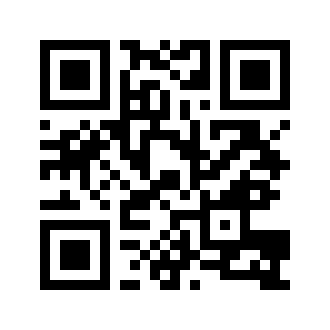

In [19]:
# Display QR code
img

**EXERCISE:** Try the QR code with your phone

## Payment QR code
* Specific URL for the payment
* Details here: https://developer.algorand.org/docs/get-details/transactions/payment_prompts/

#### Step 1: Prepare payment URL

In [20]:
amount = 1.2                                                        # in algos, will be multiplied by 1million below
amount_microalgo = str(int(amount*1e6))                             # in millialgos, must be integer
note_encoded   =  urllib.parse.quote('Thanks for the coffee')       # encode spaces etc

recipient = Alice['public']

# Specific URL structure
url = 'algorand://' + recipient + '?amount=' + amount_microalgo + '&note=' + note_encoded
print(url)

algorand://I7JQXRSQU3P36543FLSH6Z5M36GJXGZUZLWMD2567VGOIXWW6AYZCQ54WQ?amount=1200000&note=Thanks%20for%20the%20coffee


#### Step 2: Create a QR code

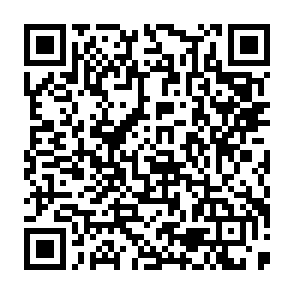

In [21]:
# Cr
qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img

### Three ways to use the QR code
- Scan with iPhone / Android Camera app $\rightarrow$ will open Algorand wallet app
- Scan with general QR scanner in Algorand wallet (top) $\rightarrow$ have to choose which account, which coin
- Start a payment manually and then scan address 

# Things that can and will go wrong
* If you loose private key and mnemonic, the money is gone
* Just because it is a QR code, it does not mean it is trustworthy

## Appendix: can you choose your Algorand Address?

* Not really, the address is the Hash of the private key
* **BUT**: we can try many private keys until we find a match

#### Trying to obtain an Address that starts with your initials
* Let us try to find an account for *Alice*, that starts with `AL`

In [ ]:
initials = "AL"
acc = generate_account_dict()
while (not acc['public'].startswith(initials)):
    acc = generate_account_dict()

In [ ]:
acc

#### Exercise
* Create an account with your initials
* Try to add one by one more letters to the initials
    * Requiring one more letter increases time by approx a factor of 30. Why?
* Discuss the claims about safety on this page: https://algovanity.com

## Appendix: QR code to install an account on the phone wallet

In [ ]:
private_key=account.generate_account()[0]             # Why the [0]? Because generate_account() returns a list!
passphrase = mnemonic.from_private_key(private_key)
url = 'algorand://'+'{"mnemonic": "'+passphrase+'"}'
print(url)

qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img

## Appendix: Playing with QR codes
* Documentation: https://pypi.org/project/qrcode/
* Error correction levels:
    * ERROR_CORRECT_L (can correct 7%)
    * ERROR_CORRECT_M (15%)
    * ERROR_CORRECT_Q (25%)
    * ERROR_CORRECT_H (30%) <-- most robust code
* Colors are CSS colors https://www.w3schools.com/cssref/css_colors.asp

In [ ]:
qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_L, 
                   box_size=10,
                   border=4)
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image(fill_color="darkblue", back_color="azure")
img

**EXERCISE** Create a QR code with white color on a black background and test it with your mobile phone.